# Часть 1

In [ ]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [ ]:
import plotly.express as px

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
import seaborn as sns

In [ ]:
import missingno

## I ПЕВИЧНЫЙ АНАЛИЗ ДАННЫХ. ВИЗУАЛИЗАЦИЯ

Используйте набор данных Fish Market для следующих упражнений. Он содержит
информацию о распространенных видах рыб в продаже на рынке. Набор данных включает
виды рыб, вес, длину, высоту и ширину.

### 1

Загрузите датасет, используя указанную ссылку
или найдите его в папке курса.

https://www.kaggle.com/aungpyaeap/fish-
market/data


Укажите тип переменных датасета.

In [ ]:
# подключение диска

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# чтение файла с диска и загрузка в датафрейм

path = "/content/drive/MyDrive/STUDY/Представление знаний и визуализация данных/Lab_7/Fish.csv"
df = pd.read_csv(path)
df.shape #размерность данных

(159, 7)

In [ ]:
# вывод информации о признаках

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Типы признаков:

1) Species (виды рыб) - категориальный признак, неметрическая номинативная шкала;

2) Weight (вес рыбы в граммах) - количественный признак, метрическая шкала отношений; 

3) Length1 (вертикальная длина в см) - количественный признак, метрическая шкала отношений; 

4) Length2 (диагональная длина в см) - количественный признак, метрическая шкала отношений; 

5) Length3 (длина поперечного сечения в см) - количественный признак, метрическая шкала отношений; 

6) Height (высота в см) - количественный признак, метрическая шкала отношений; 

7) Width (ширина в см) - количественный признак, метрическая шкала отношений; 



In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 2

Выведите описательную статистику для
переменных датасета.

In [ ]:
stats = df.describe(include = 'all')
print(stats)

       Species       Weight     Length1     Length2     Length3      Height  \
count      159   159.000000  159.000000  159.000000  159.000000  159.000000   
unique       7          NaN         NaN         NaN         NaN         NaN   
top      Perch          NaN         NaN         NaN         NaN         NaN   
freq        56          NaN         NaN         NaN         NaN         NaN   
mean       NaN   398.326415   26.247170   28.415723   31.227044    8.970994   
std        NaN   357.978317    9.996441   10.716328   11.610246    4.286208   
min        NaN     0.000000    7.500000    8.400000    8.800000    1.728400   
25%        NaN   120.000000   19.050000   21.000000   23.150000    5.944800   
50%        NaN   273.000000   25.200000   27.300000   29.400000    7.786000   
75%        NaN   650.000000   32.700000   35.500000   39.650000   12.365900   
max        NaN  1650.000000   59.000000   63.400000   68.000000   18.957000   

             Width  
count   159.000000  
unique   

### 3

Используя визуализацию, покажите, сколько
различных видов рыб включает ваш набор
данных. Используйте интерактивную
визуализацию.

In [ ]:
species = df['Species'].value_counts()
species

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [ ]:
fig = px.pie(values=species.values, names=species.index, title="Species",color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_traces(marker_line_width=1,marker_line_color="white")
fig.show()

Диаграмма показывает, что в датасете 7 различных видов рыб.

<Axes: >

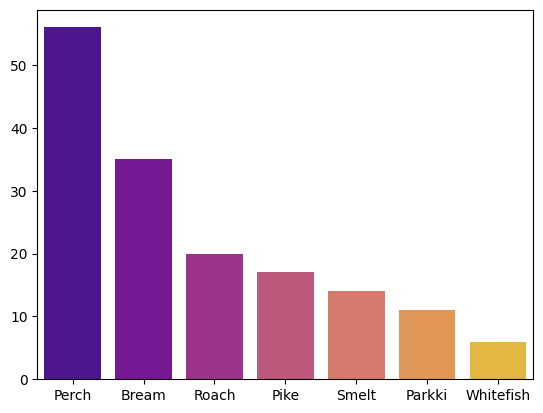

In [ ]:
sns.barplot(data=df, x=species.index, y=species.values, palette = 'plasma')

Визуализация с помощью стобчатой диаграммы.

### 4

Исследуйте, есть ли какие-либо зависимые
переменные.

<ipython-input-16-f29df4b0f602>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

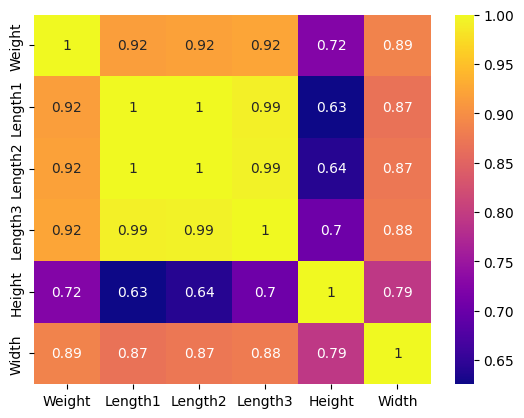

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap='plasma')

Матрица корреляции показывает, что между признаками достатчно высокая корреляция.

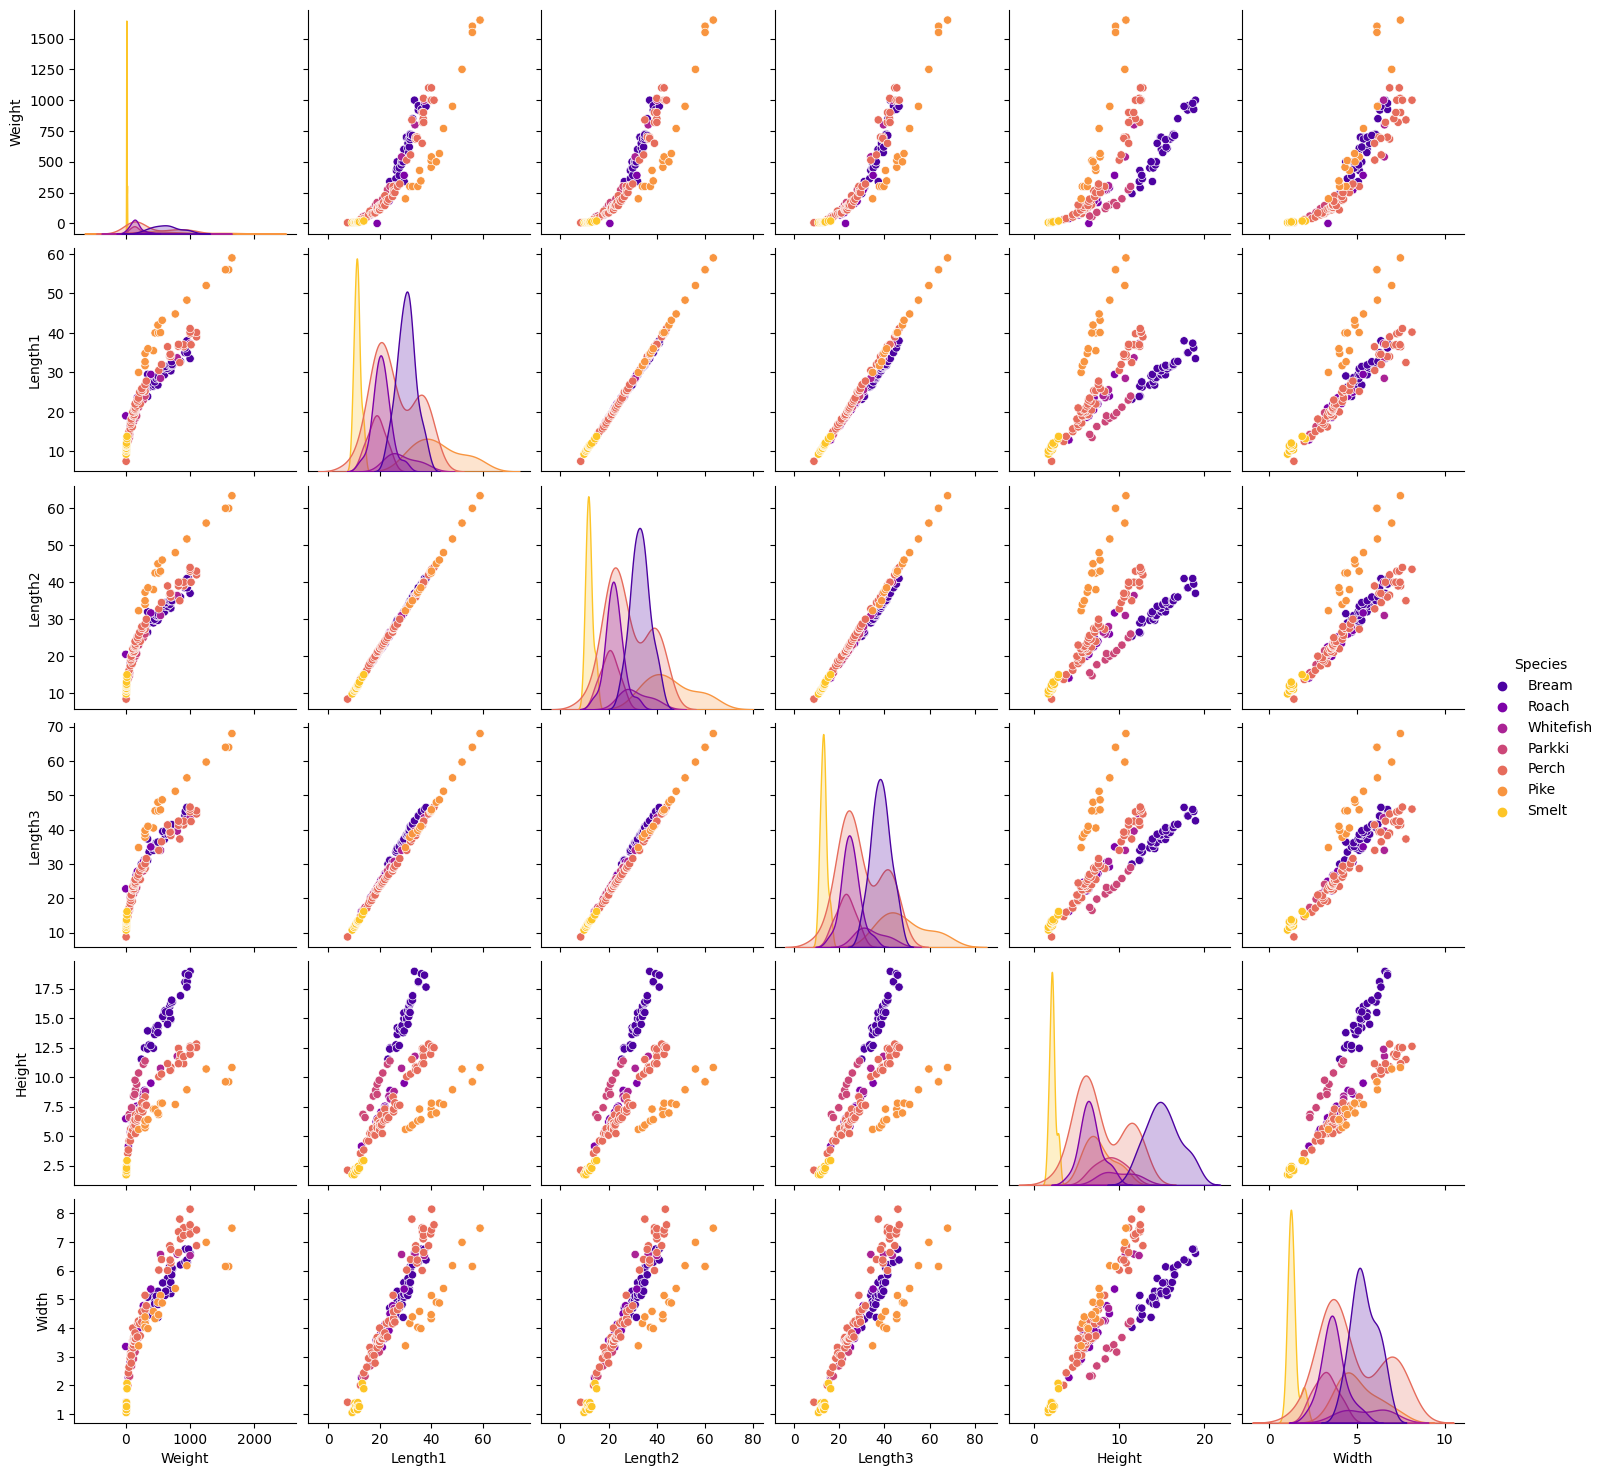

In [ ]:
sns.pairplot(df, hue="Species", palette = 'plasma')

Построили диаграммы рассеяния с разделением по видам рыб. Поскольку параметры рыбы взаимосвязаны между собой, зависимость наблюдается для каждого вида.

### 5

Определите тип распределения количественных
переменных.

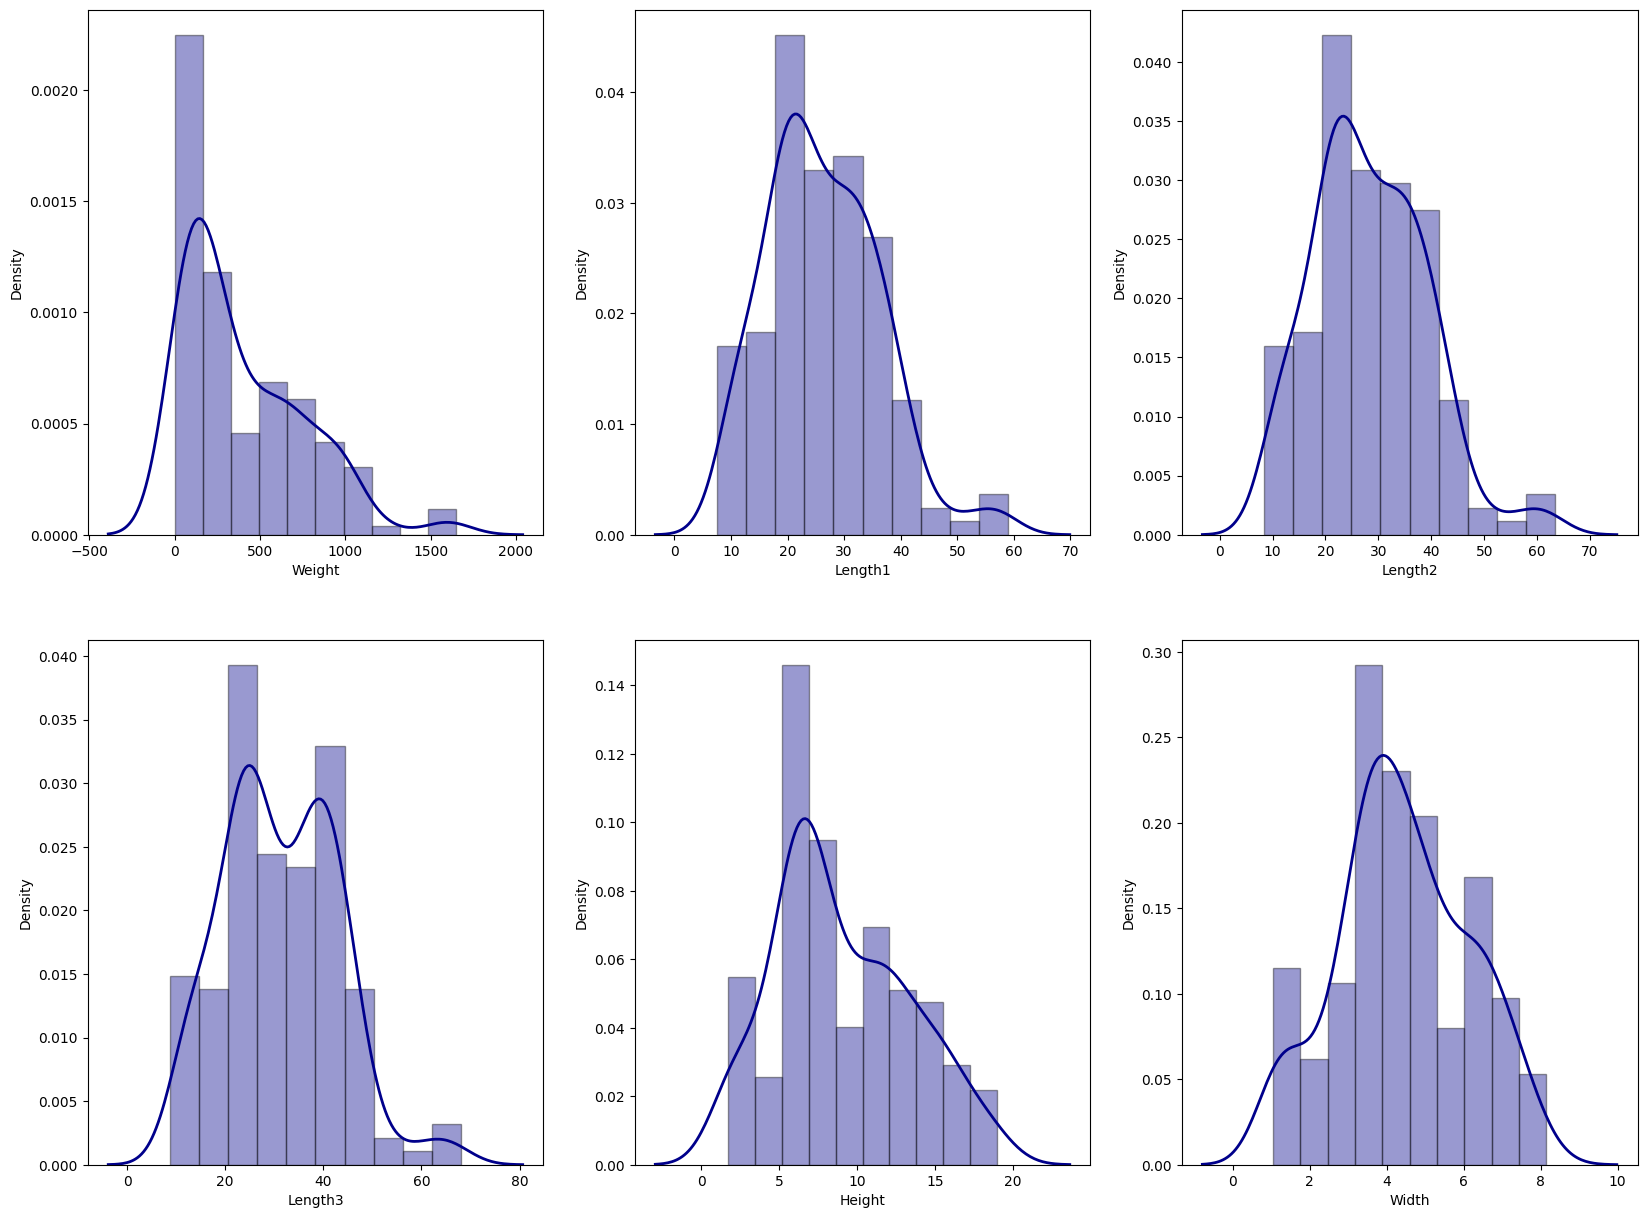

In [ ]:
# визуализация численных признаков с помощью distplot

# ставим фильтр на предупреждения
# (метод distplot является нерекомендуемым)
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20, 15))

# признак Weight
plt.subplot(231)
sns.distplot(df['Weight'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак Length1
plt.subplot(232)
sns.distplot(df['Length1'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак Length2
plt.subplot(233)
sns.distplot(df['Length2'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак Length3
plt.subplot(234)
sns.distplot(df['Length3'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак Height
plt.subplot(235)
sns.distplot(df['Height'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# признак Width 
plt.subplot(236)
sns.distplot(df['Width'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.show()

По виду графиков можно предположить, что все распределения асимметричные, а распределение признака Length3 имеет бимодальный характер. Асимметрия может возникнуть из-за того, что в наборе содержатся данные для нескольких видов рыб.

### 6

Существуют ли в этом наборе данных аномальные
наблюдения?

In [ ]:
fig = px.box(df, y="Weight",  points="all")
fig.show()

Боксплот для Weight показывает наличие нескольких выбросов.

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(y=df['Length1'].values, name=df['Length1'].name))
fig.add_trace(go.Box(y=df['Length2'].values, name=df['Length2'].name))
fig.add_trace(go.Box(y=df['Length3'].values, name=df['Length3'].name))
  
fig.show()

График для выбросов по признакам Lenght_i.

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(y=df['Height'].values, name=df['Height'].name))
fig.add_trace(go.Box(y=df['Width'].values, name=df['Width'].name))
  
fig.show()

На графиках для Height и Width выбросы отсутствуют.

Построим графики для каждого вида рыб в отдельности.

In [ ]:
df_bream = df.loc[df['Species'] == 'Bream']
df_roach = df.loc[df['Species'] == 'Roach']
df_wf = df.loc[df['Species'] == 'Whitefish']
df_parkki = df.loc[df['Species'] == 'Parkki']
df_perch = df.loc[df['Species'] == 'Perch']
df_pike = df.loc[df['Species'] == 'Pike']
df_smelt = df.loc[df['Species'] == 'Smelt']

Выведем описательную статистику по каждому виду для признаков Weight и Height.

In [ ]:
stats = df_bream[['Weight','Height']].describe(include = 'all')
print(stats)
stats = df_roach[['Weight','Height']].describe(include = 'all')
print(stats)
stats = df_wf[['Weight','Height']].describe(include = 'all')
print(stats)
stats = df_parkki[['Weight','Height']].describe(include = 'all')
print(stats)
stats = df_perch[['Weight','Height']].describe(include = 'all')
print(stats)
stats = df_pike[['Weight','Height']].describe(include = 'all')
print(stats)
stats = df_smelt[['Weight','Height']].describe(include = 'all')
print(stats)

            Weight     Height
count    35.000000  35.000000
mean    617.828571  15.183211
std     209.205709   1.964707
min     242.000000  11.520000
25%     462.500000  13.958900
50%     610.000000  14.954400
75%     717.000000  16.360900
max    1000.000000  18.957000
           Weight     Height
count   20.000000  20.000000
mean   152.050000   6.694795
std     88.828916   1.261192
min      0.000000   4.147200
25%    104.250000   6.037075
50%    147.500000   6.512600
75%    171.750000   7.164150
max    390.000000   9.485000
            Weight     Height
count     6.000000   6.000000
mean    531.000000  10.027167
std     309.602972   1.830201
min     270.000000   8.145400
25%     279.000000   8.479800
50%     423.000000   9.761000
75%     735.000000  11.506900
max    1000.000000  12.354000
           Weight     Height
count   11.000000  11.000000
mean   154.818182   8.962427
std     78.755086   1.615650
min     55.000000   6.577200
25%    105.000000   7.898700
50%    145.000000   8.892

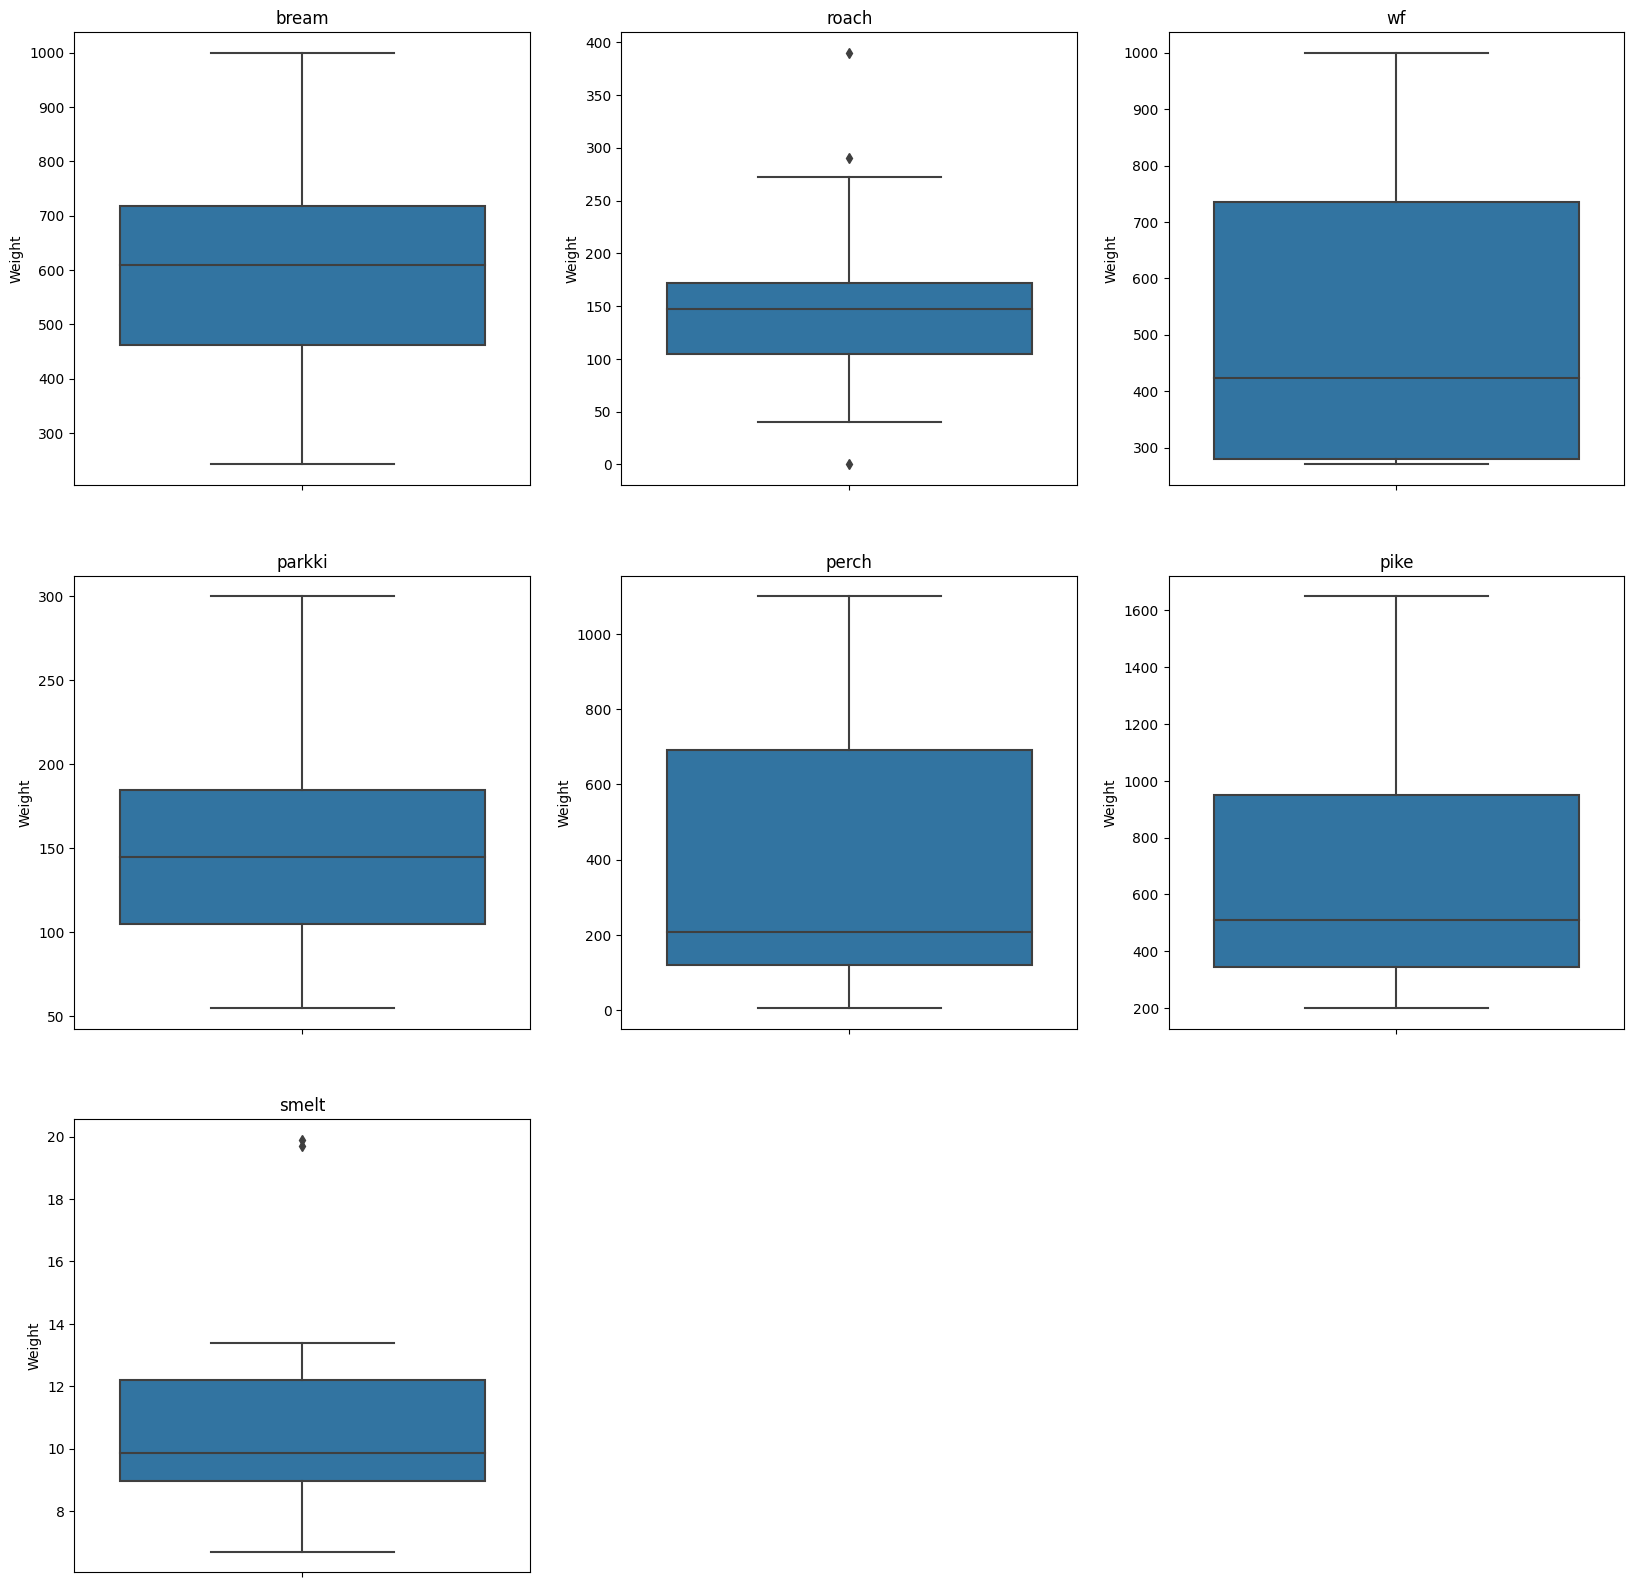

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(331)
sns.boxplot(data=df_bream, y="Weight").set_title('bream')

plt.subplot(332)
sns.boxplot(data=df_roach, y="Weight").set_title('roach')

plt.subplot(333)
sns.boxplot(data=df_wf, y="Weight").set_title('wf')

plt.subplot(334)
sns.boxplot(data=df_parkki, y="Weight").set_title('parkki')

plt.subplot(335)
sns.boxplot(data=df_perch, y="Weight").set_title('perch')
 
plt.subplot(336)
sns.boxplot(data=df_pike, y="Weight").set_title('pike')

plt.subplot(337)
sns.boxplot(data=df_smelt, y="Weight").set_title('smelt')

plt.show()

На графиках видно несколько выбросов даже внутри некоторых видов.

Аналогичный график и выводы для признака Height.

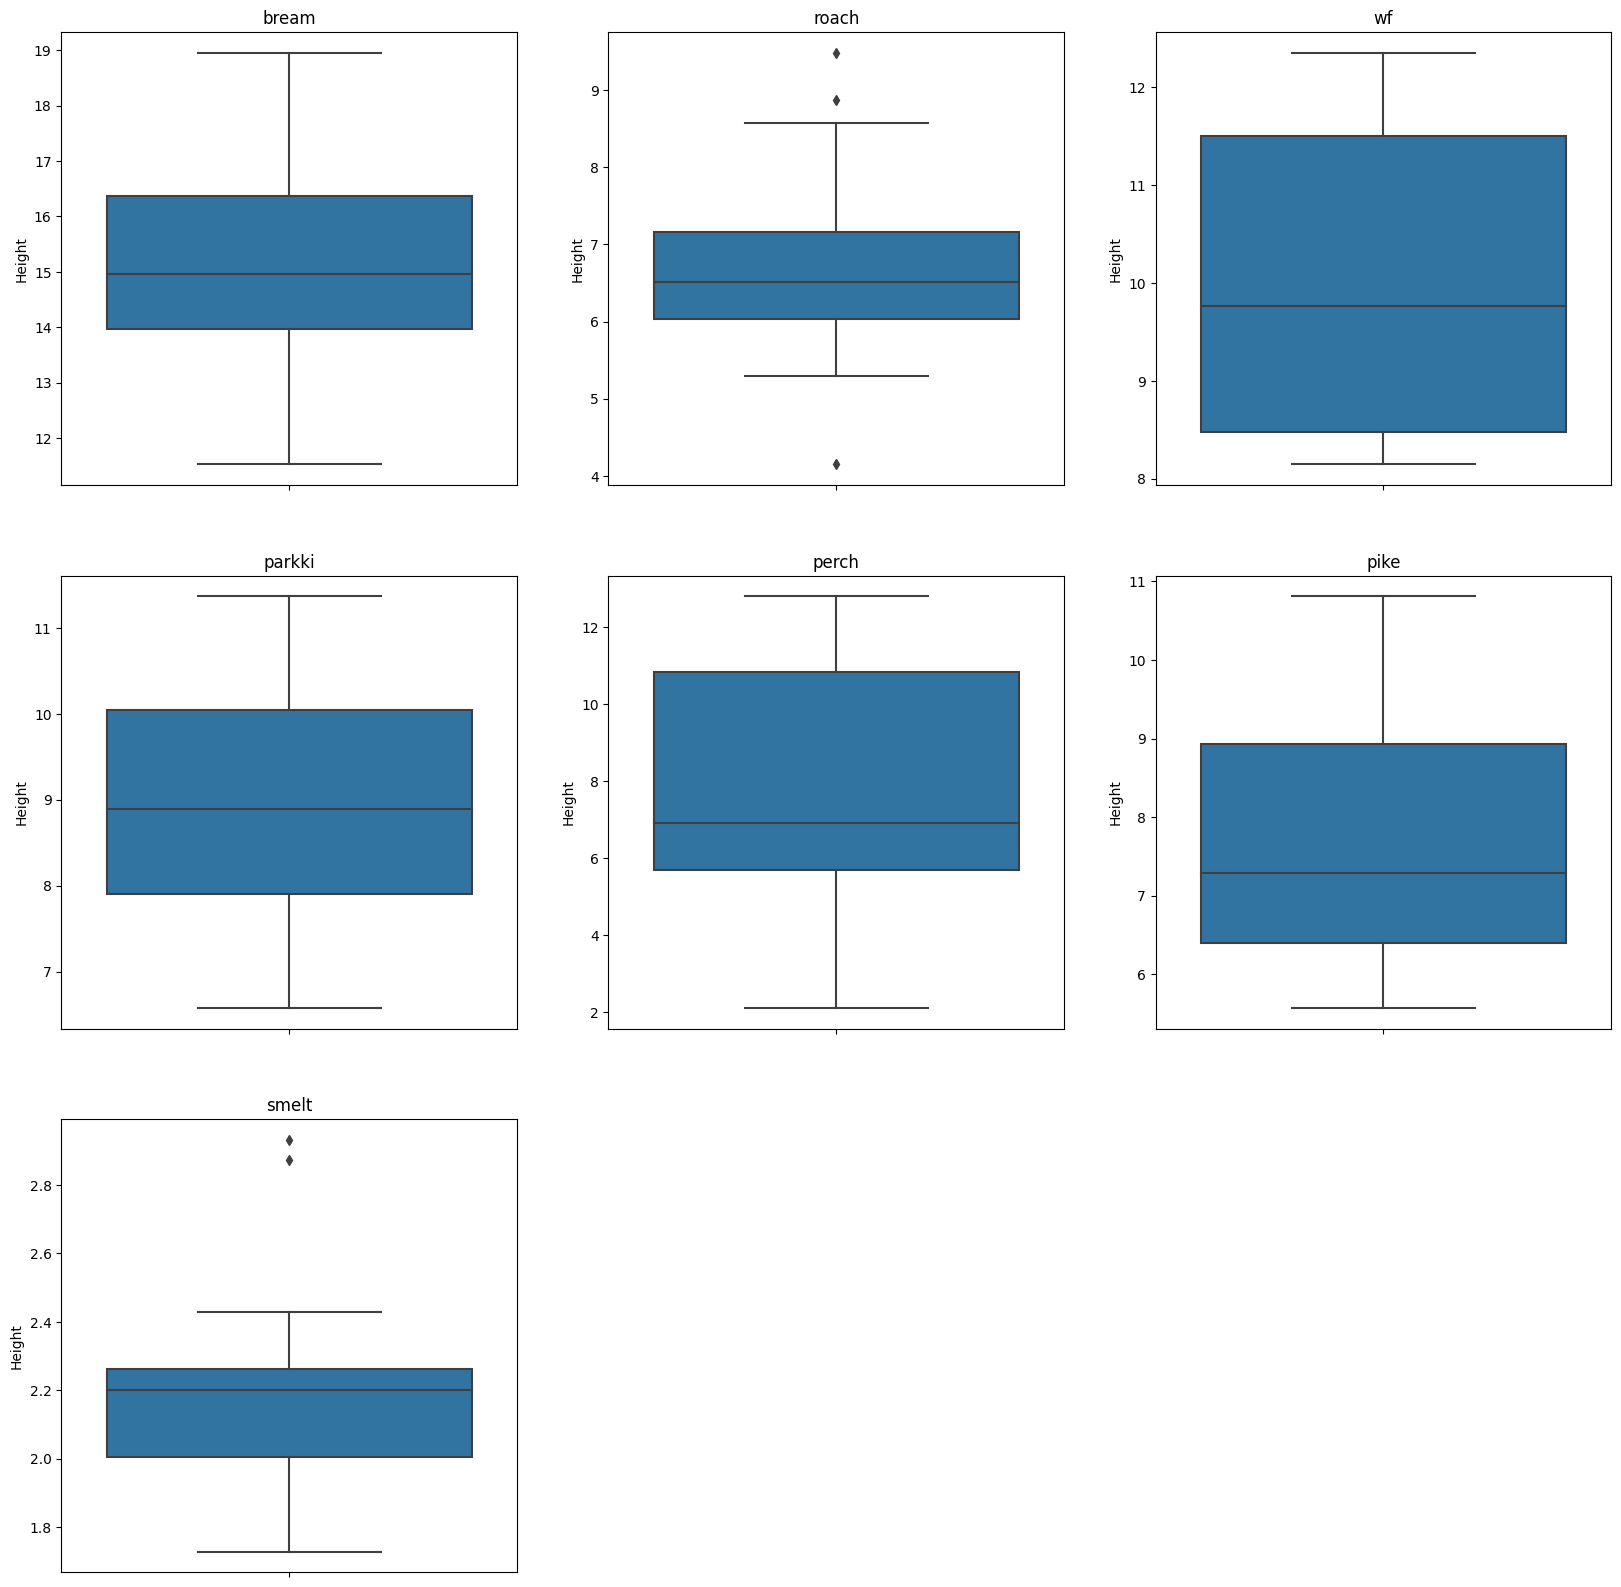

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(331)
sns.boxplot(data=df_bream, y="Height").set_title('bream')

plt.subplot(332)
sns.boxplot(data=df_roach, y="Height").set_title('roach')

plt.subplot(333)
sns.boxplot(data=df_wf, y="Height").set_title('wf')

plt.subplot(334)
sns.boxplot(data=df_parkki, y="Height").set_title('parkki')

plt.subplot(335)
sns.boxplot(data=df_perch, y="Height").set_title('perch')
 
plt.subplot(336)
sns.boxplot(data=df_pike, y="Height").set_title('pike')

plt.subplot(337)
sns.boxplot(data=df_smelt, y="Height").set_title('smelt')

plt.show()

### 7

Проверьте данные на наличие пропущенных
значений.

<Axes: >

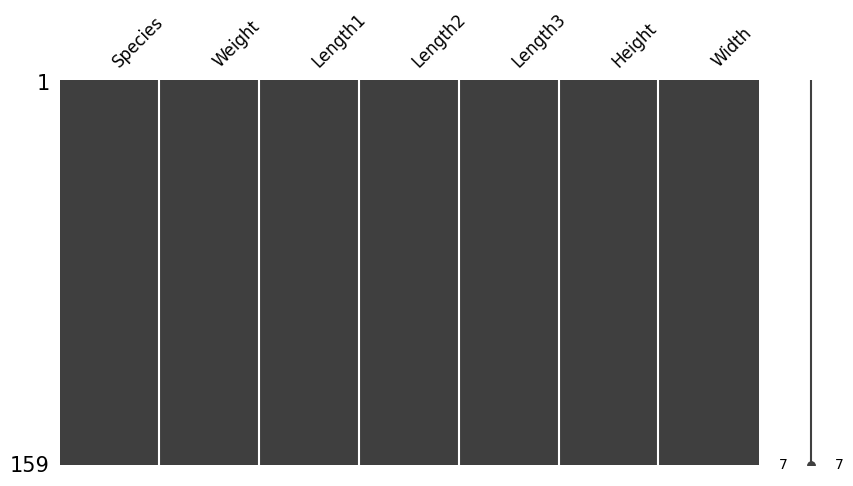

In [ ]:
missingno.matrix(df,figsize=(10,5), fontsize=12)

In [ ]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

В датасете нет пропусков.

### 8

Можно построить кривые
Эндрюса, графики в
параллельных координатах,
лица Чернова, графики RadViz
и т.п.

In [ ]:
!pip install ChernoffFace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ChernoffFace import *
import numpy
import matplotlib.cm

In [ ]:
df_gr_sp = df.groupby(['Species']).mean().reset_index()

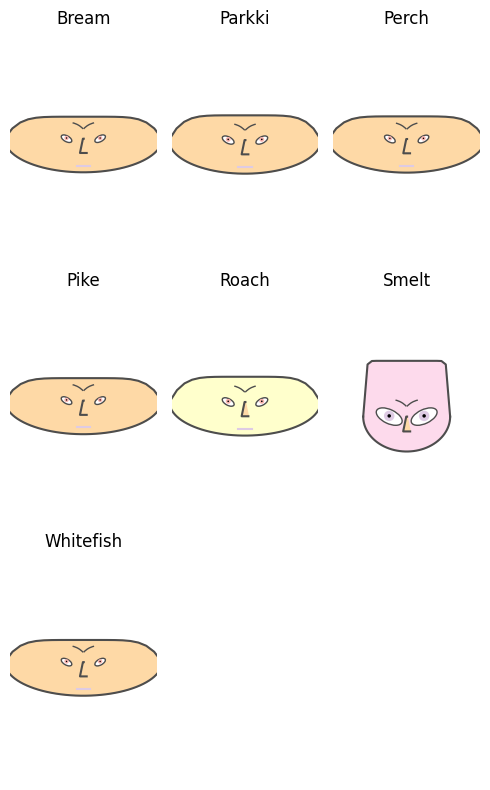

In [ ]:
fig = chernoff_face(data=df_gr_sp,
                    n_columns=None,
                    long_face=False,
                    color_mapper=matplotlib.cm.Pastel1,
                    figsize=(5, 8), dpi=100)
fig.tight_layout()
matplotlib.pyplot.show()

Лица Чернова показывают, что пять видов рыб в среднем похожи между собой, и только два имеют значимые отличия.

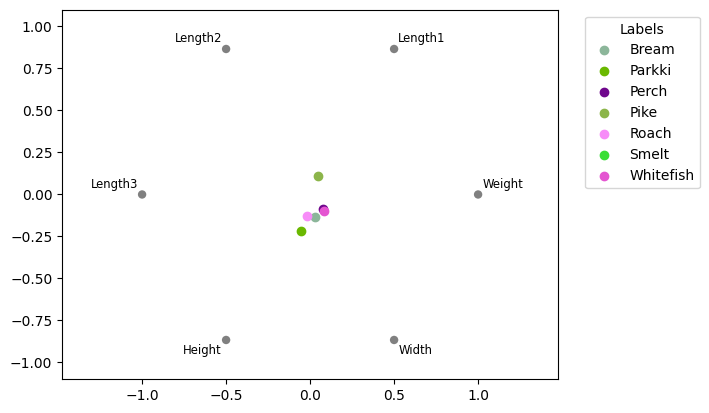

In [ ]:
pd.plotting.radviz(df_gr_sp, 'Species').legend(loc='upper right', title='Labels',bbox_to_anchor=(1.3, 1)) 

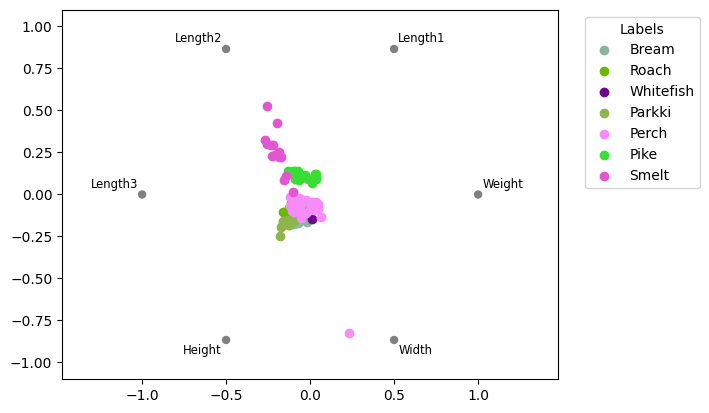

In [ ]:
pd.plotting.radviz(df, 'Species').legend(loc='upper right', title='Labels',bbox_to_anchor=(1.3, 1)) 

На графиках выше заметны некоторые выбросы, а также то, что для вида Smelt значения имеют относительно большой разброс.

## II РЕГРЕССИОННЫЙ АНАЛИЗ

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Проанализируем зависимость между признаками Height и Weight для вида рыб bream.

In [ ]:
X = df_bream[['Height']]
Y = df_bream[['Weight']]

Построим график линейной регрессии веса от роста рыбы с помощью regplot.

<Axes: xlabel='Height', ylabel='Weight'>

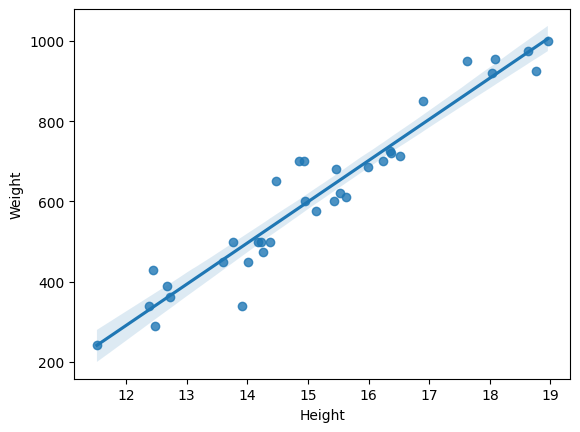

In [ ]:
sns.regplot(x=X, y=Y)

Построим модель линейной регрессии с помощью statmodels.

In [ ]:
model = sm.OLS(Y, X).fit()
ypred = model.predict(X) 

ypred.shape

(35,)

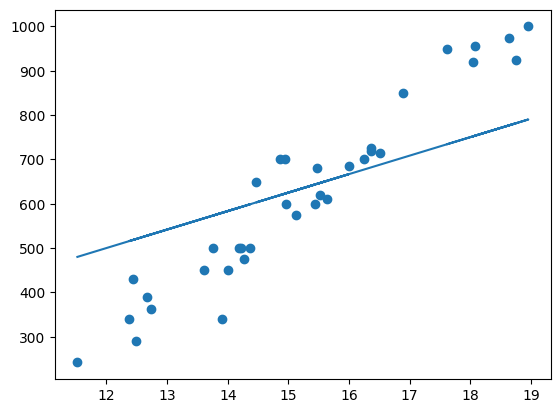

In [ ]:
plt.scatter(X,Y)
plt.plot(X,ypred)

Визуально statmodels справилась несколько хуже, чем regplot. 

Это произошло из-за особенностей реализации линейной регресси в библиотеки statmodels. В statmodels существуют процедурная и объектная реализации. Процедурная представлена ниже:

In [ ]:
lin_model = ols('Weight ~ Height', data=df_bream).fit()
print(lin_model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     440.5
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.16e-20
Time:                        09:32:33   Log-Likelihood:                -189.56
No. Observations:                  35   AIC:                             383.1
Df Residuals:                      33   BIC:                             386.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -941.5590     74.896    -12.571      0.0

In [ ]:
ypred = lin_model.predict(X) 

ypred.shape

(35,)

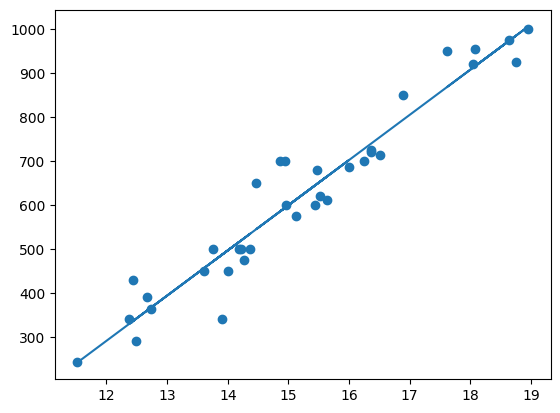

In [ ]:
plt.scatter(X,Y)
plt.plot(X,ypred)

Процедурная реализация работает достаточно предсказуемо. В объектной реализации (класс OLS) есть тонкость: если перед тем, как строить модель, не использовать функцию add_constant, которая добавляет столбец из единиц в массив, то будет построена модель без свободного члена (intercept). После добавления столбца модель линейной регрессии строится так же, как при использовании функции ols().

https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

https://www.statsmodels.org/dev/generated/statsmodels.tools.tools.add_constant.html#statsmodels.tools.tools.add_constant

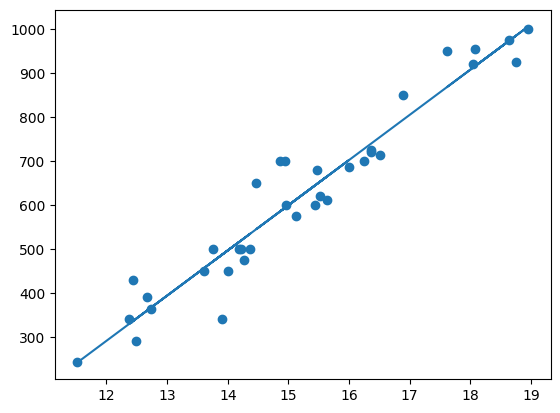

In [ ]:
model = sm.OLS(df_bream['Weight'], sm.add_constant(df_bream['Height'])).fit()
#ypred = model.predict(df_bream['Height']) 
ypred = model.fittedvalues

plt.scatter(df_bream['Height'],df_bream['Weight'])
plt.plot(df_bream['Height'],ypred)

Построение модели линейной регрессии с помощью scipy.

In [ ]:
import scipy.stats as sps

reg = sps.linregress(df_bream['Height'], df_bream['Weight'])
print(f'Scipy function: a = {round(reg.intercept, 3)}; b = {round(reg.slope, 3)}')

Scipy function: a = -941.559; b = 102.705


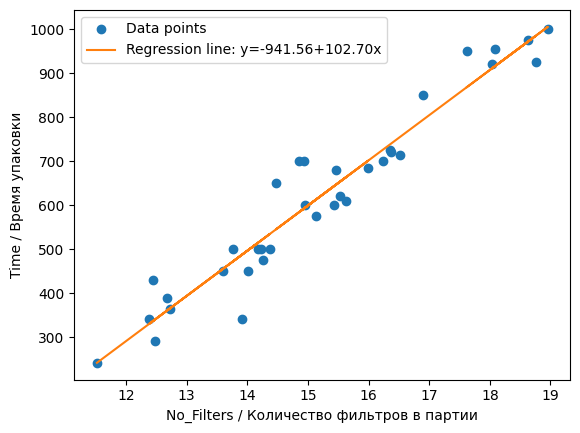

In [ ]:
Time_predict = [(reg.intercept + reg.slope * x) for x in df_bream['Height']]
line = f'Regression line: y={reg.intercept:.2f}+{reg.slope:.2f}x'
fig, ax = plt.subplots()
ax.plot(df_bream['Height'],df_bream['Weight'], linewidth=0, marker='o', label='Data points')
ax.plot(df_bream['Height'], Time_predict, label=line)
ax.set_xlabel('No_Filters / Количество фильтров в партии')
ax.set_ylabel('Time / Время упаковки')
ax.legend(facecolor='white')
plt.show()

Построим модель множественной линейной регрессии: Weight ~ Height + Width.

In [ ]:
# fit linear regression model
mul_model = ols('Weight ~ Height + Width', data=df).fit ()

Построим графики частичной регрессии.

eval_env: 1
eval_env: 1
eval_env: 1


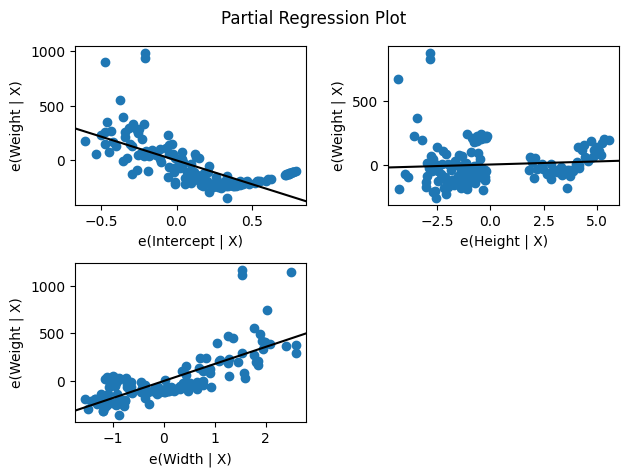

In [ ]:
fig = sm.graphics.plot_partregress_grid(mul_model)
fig.tight_layout(pad=1.0)

И график компонент-компонент плюс остаток (CCPR).

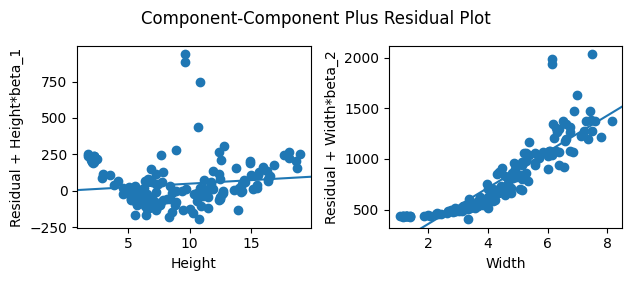

In [ ]:
fig = sm.graphics.plot_ccpr_grid(mul_model)
fig.tight_layout(pad=1.0)

Из графиков выше мы можем оценить влияние независимых переменных на зависимую, принимая во внимание влияние других независимых переменных. По графикам можно предположить, что зависимость между признаками в действительности не является линейной.

Построим однофакторную полиномиальную модель.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(X)
xp.shape

(35, 3)

In [ ]:
p_model = sm.OLS(Y, xp).fit()
ypred = p_model.predict(xp) 

ypred.shape

(35,)

eval_env: 1
eval_env: 1
eval_env: 1


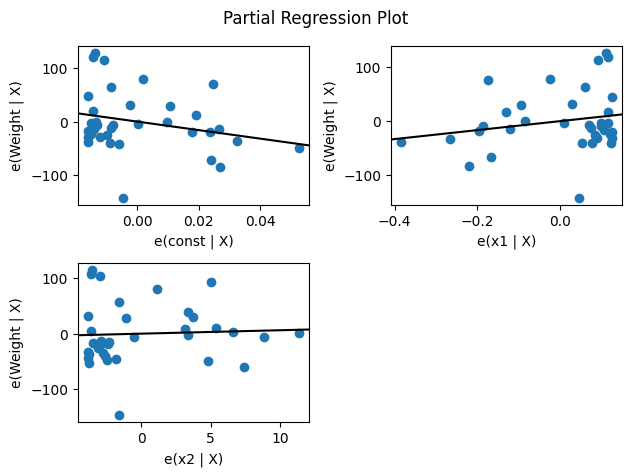

In [ ]:
fig = sm.graphics.plot_partregress_grid(p_model)
fig.tight_layout(pad=1.0)

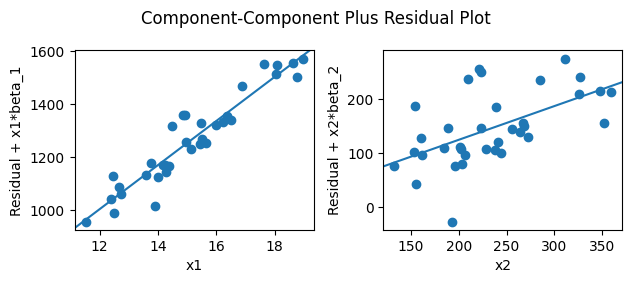

In [ ]:
fig = sm.graphics.plot_ccpr_grid(p_model)
fig.tight_layout(pad=1.0)

Построив аналогичные графики, мы можем визуально оценить полиномиальную модель и сделать вывод, что она лучше по сравнению с линейной позволяет оценить значения выбранных признаков.

# Часть 2

Необходимо провести исследования, близкие к тем, что проводились в Части 1. Возможно
проведение других видов анализа, вместо/вместе с регрессионным: кластеризация,
классификация, факторный анализ и т.п. с обязательным представлением визуальных
элементов.

Для исследования был выбран датасет Chocolate Bar Ratings - экспертный рейтинг более 1700 шоколадных батончиков.

https://www.kaggle.com/rtatman/chocolate-bar-ratings

In [ ]:
# чтение файла с диска и загрузка в датафрейм

chocolate_path = "/content/drive/MyDrive/STUDY/Представление знаний и визуализация данных/Lab_7/flavors_of_cacao.csv"
chocolate_df = pd.read_csv(chocolate_path)
chocolate_df.shape #размерность данных

(1795, 9)

In [ ]:
chocolate_df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


## Первичный анализ данных. Визуализация

### Описание признаков

Выведем имена столбцов.

In [ ]:
chocolate_df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

Столбцы имеют не очень удобные для работы названия, поэтому для дальнейшей работы их лучше переименовать.

In [ ]:
# заменяем символ '\n'

new_colnames = []

for col in chocolate_df.columns:
    if '\n' in col:
        new_name = col.replace('\n', ' ')
    else:
        new_name = col
    new_colnames.append(new_name)

new_colnames

['Company\xa0 (Maker-if known)',
 'Specific Bean Origin or Bar Name',
 'REF',
 'Review Date',
 'Cocoa Percent',
 'Company Location',
 'Rating',
 'Bean Type',
 'Broad Bean Origin']

In [ ]:
# делаем некоторые названия короче

new_colnames[0] = 'Company (if known)'
new_colnames[1] = 'Bar Origin'

new_colnames[8] = 'Bean Origin'
new_colnames

['Company (if known)',
 'Bar Origin',
 'REF',
 'Review Date',
 'Cocoa Percent',
 'Company Location',
 'Rating',
 'Bean Type',
 'Bean Origin']

In [ ]:
# замена имен столбцов

chocolate_df.columns = new_colnames
chocolate_df.head(3)

,Company (if known),Bar Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo


Также удобнее для исследований поменять представление процентов в столбце Percent на тип float.

In [ ]:
chocolate_df['Cocoa Percent'] = chocolate_df['Cocoa Percent'].apply(lambda x: float(x.strip('%')) / 100.0)
chocolate_df.head(3)

,Company (if known),Bar Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo


Вывод информации о типах признаков:

In [ ]:
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company (if known)  1795 non-null   object 
 1   Bar Origin          1795 non-null   object 
 2   REF                 1795 non-null   int64  
 3   Review Date         1795 non-null   int64  
 4   Cocoa Percent       1795 non-null   float64
 5   Company Location    1795 non-null   object 
 6   Rating              1795 non-null   float64
 7   Bean Type           1794 non-null   object 
 8   Bean Origin         1794 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


Признаки и их тип:

1) Company (название компании-производителя) - категориальный;

2) Bean Origin (конкретный географический регион происхождения бобов) - категориальный;

3) REF (значение, связанное с моментом ввода отзыва в базу данных. Более высокий = более свежий) - категориальный, некатегоризованный;

4) ReviewDate (дата публикации рецензии) - количественный;

5) CocoaPercent (процентное содержание какао в проверяемой плитке шоколада) - количественный;

6) CompanyLocation (страна-производитель) - категориальный;

7) Rating (экспертный рейтинг) - порядковый;


*   5= Элита (выходящая за рамки обычного)
*   4= Премиум-класс (превосходное развитие вкуса, характера и стиля)
*   3= Удовлетворительно (3,0) - достойно похвалы (3,75) (хорошо сделано с особыми качествами)
*   2= Разочаровывает (приемлемо, но содержит по крайней мере один существенный недостаток)
*   1= Неприятный (в основном невкусный)


8) BeanType (используемый сорт бобов, если таковой имеется) - категориальный;

9) BeanOrigin (широкий географический регион происхождения бобов) - категориальный;

### Описательная статистика для количественных признаков

In [ ]:
df_numeric = chocolate_df[['REF', 'Review Date', 'Cocoa Percent', 'Rating']]

df_numeric.describe()

,REF,Review Date,Cocoa Percent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,0.716983,3.185933
std,552.886365,2.927210,0.063231,0.478062
min,5.000000,2006.000000,0.420000,1.000000
25%,576.000000,2010.000000,0.700000,2.875000
50%,1069.000000,2013.000000,0.700000,3.250000
75%,1502.000000,2015.000000,0.750000,3.500000
max,1952.000000,2017.000000,1.000000,5.000000


Text(0.5, 1.0, 'Распределение признака REF')

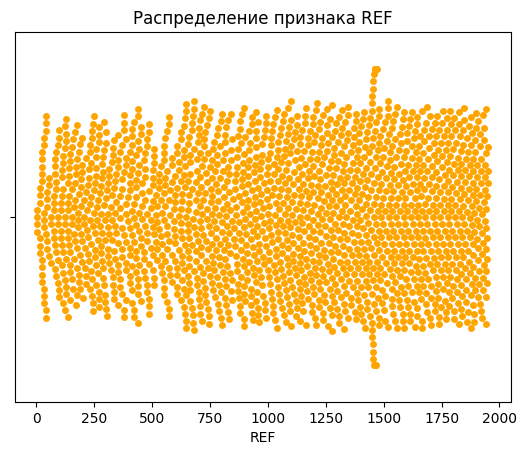

In [ ]:
sns.swarmplot(data = df_numeric, x = 'REF', color = 'orange')
plt.title('Распределение признака REF')

График показывает, что данные распределены почти равномерно.

Text(0.5, 1.0, 'Количество рецензий в год')

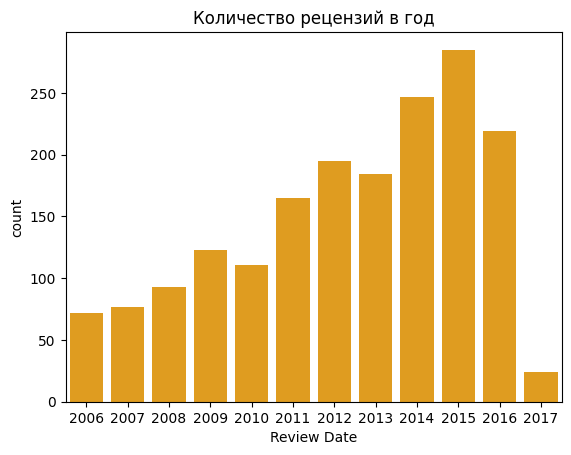

In [ ]:
sns.countplot(data = df_numeric, x = 'Review Date', color = 'orange' )
plt.title('Количество рецензий в год')

График показывает, что по количество рецензий сильно отличается в зависимости от года (датасет не сбалансирован).

Text(0.5, 1.0, 'Наиболее часто встречающийся процент какао в шоколаде')

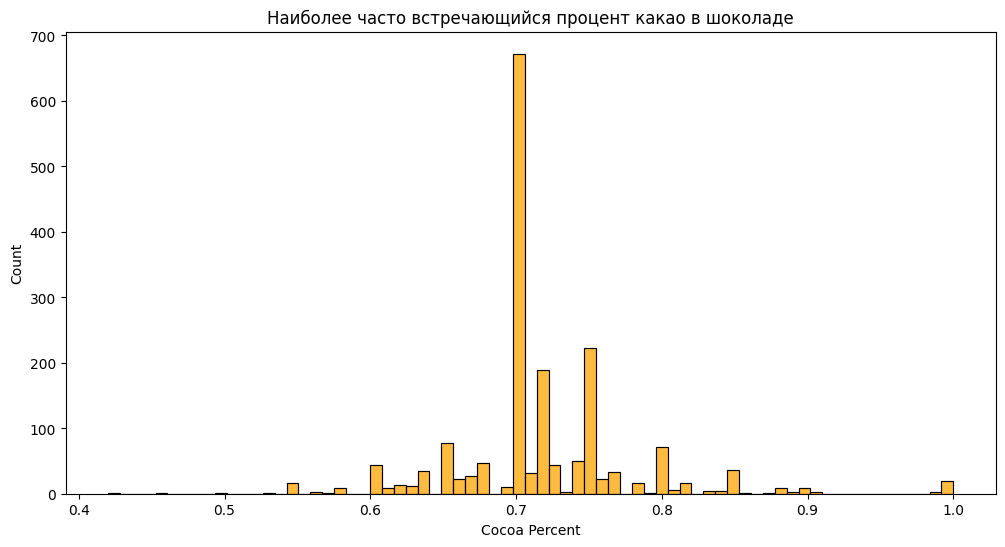

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(data = df_numeric, x = 'Cocoa Percent', color = 'orange')
plt.title('Наиболее часто встречающийся процент какао в шоколаде')

График показывает, что чаще всего встречается шоколад с горькостью 70%.

Text(0.5, 1.0, 'Распределение рейтинга')

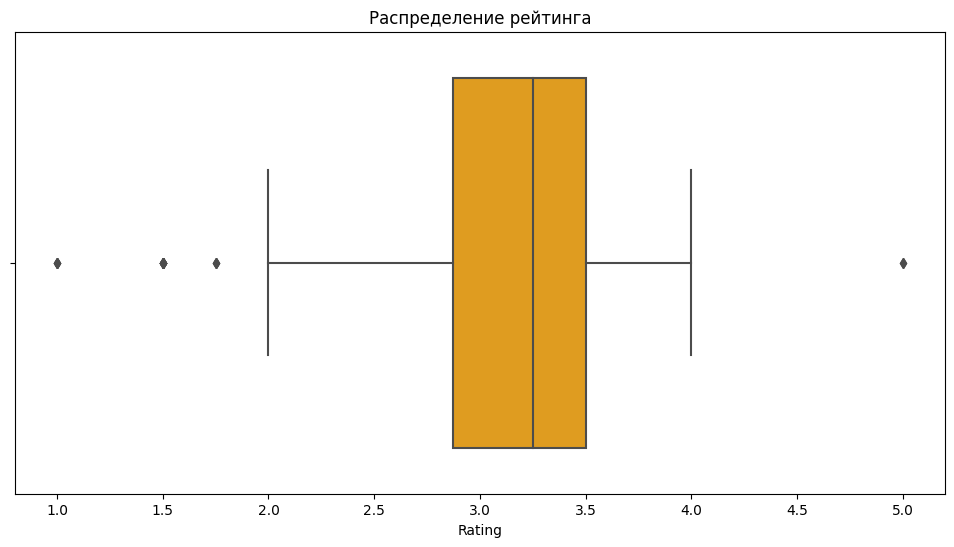

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df_numeric, x = 'Rating', color = 'orange')
plt.title('Распределение рейтинга')

Заметны выбросы, как в в меньшую, так и в большую сторону.

Описательная статистика для категориальных переменных.

In [ ]:
df_categorical = chocolate_df[['Company (if known)', 'Company Location', 'Bar Origin', 'Bean Origin', 'Bean Type']]

df_categorical.describe()

,Company (if known),Company Location,Bar Origin,Bean Origin,Bean Type
count,1795,1795,1795,1794,1794
unique,416,60,1039,100,41
top,Soma,U.S.A.,Madagascar,Venezuela,
freq,47,764,57,214,887


Статистика показывает, что батончики имеют очень разнообразное происхождение.

Выведем столбчатые диаграммы для категориальных признаков.

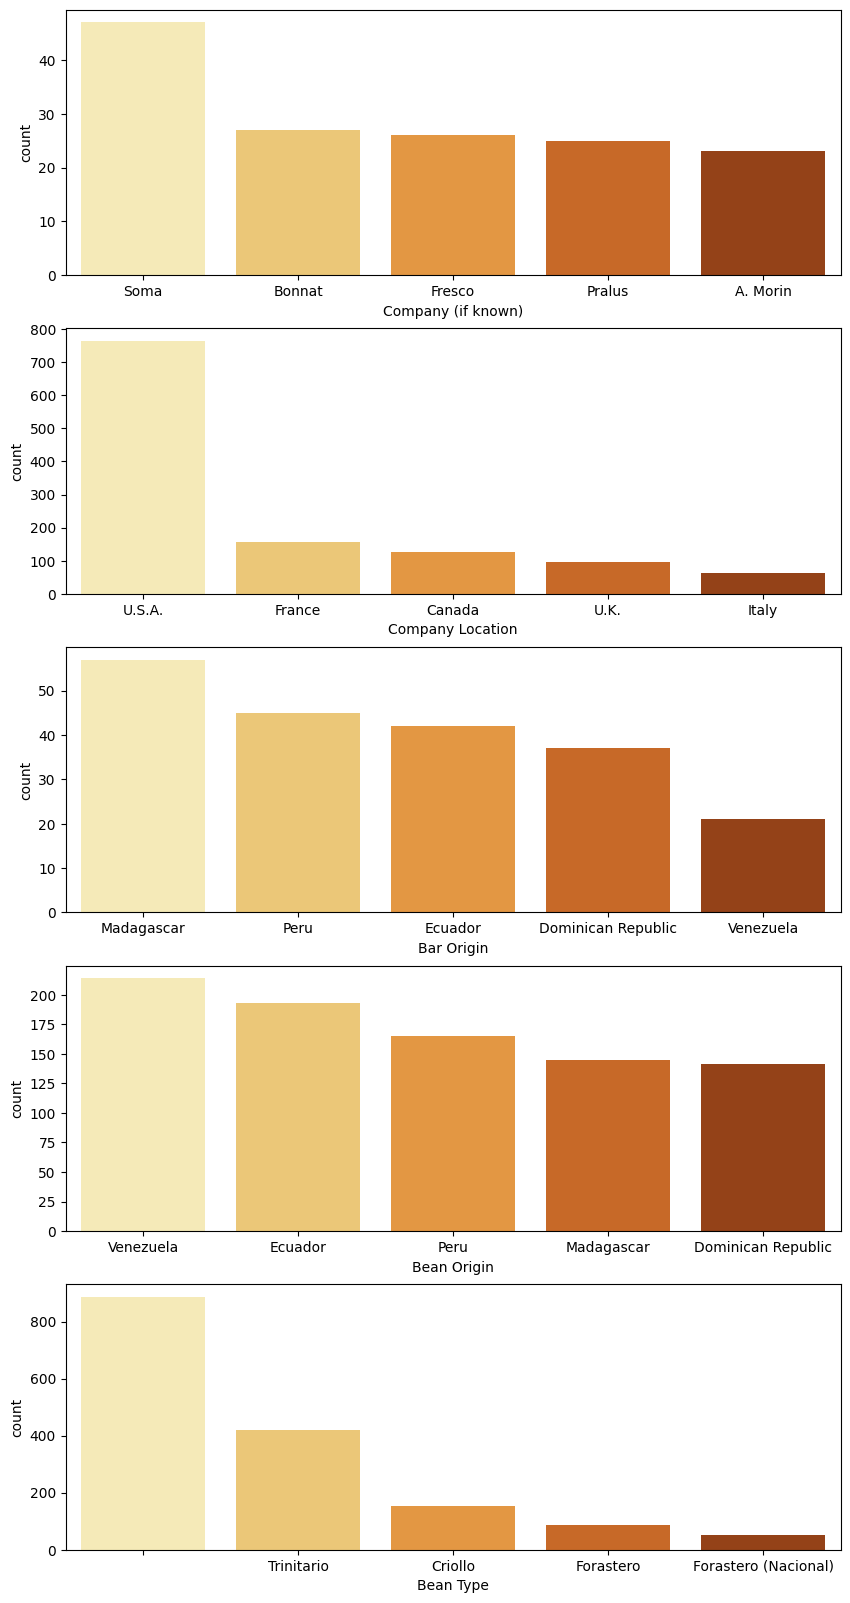

In [ ]:
fig, axs = plt.subplots(nrows=5)
fig.set_figheight(20)
fig.set_figwidth(10)

n = 0
for col in df_categorical.columns:
    sns.countplot(data = df_categorical, x = col, palette = "YlOrBr",
                  order = df_categorical[col].value_counts().iloc[:5].index, ax=axs[n])
    n = n+1



Из графиков можно получить следующую информацию:

- компания Soma внесла в этот набор данных больше всего шоколадных батончиков;
- большинство компаний из США;
- однако сами бобы в основном из Центральной и Южной Америки;
- батончики также в основном производятся в Южной Америке;
- у большинства бобов не указан тип бобов, тип бобов Trinitario самый популярный из известных.


## Регрессионный анализ

In [ ]:
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company (if known)  1795 non-null   object 
 1   Bar Origin          1795 non-null   object 
 2   REF                 1795 non-null   int64  
 3   Review Date         1795 non-null   int64  
 4   Cocoa Percent       1795 non-null   float64
 5   Company Location    1795 non-null   object 
 6   Rating              1795 non-null   float64
 7   Bean Type           1794 non-null   object 
 8   Bean Origin         1794 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


Построим матрицу корреляции для числовых признаков.

<Axes: >

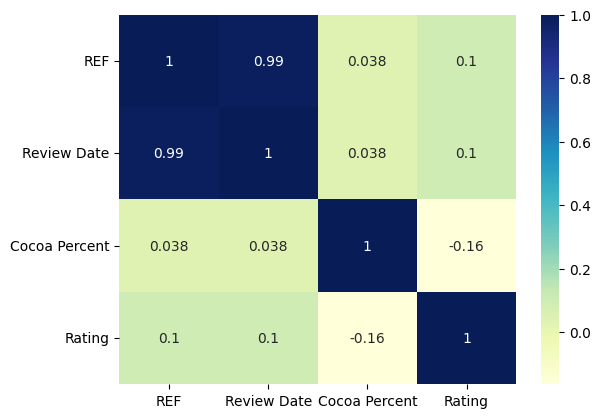

In [ ]:
ans = chocolate_df.corr()
sns.heatmap(ans,annot=True,cmap="YlGnBu")

Корреляция между признаками слабая. Также можно отметить, что между процентным содержанием какао и рейтингом отрицательная корреляция - для более горького шоколада рейтинг ниже.

Построим регрессионную модель для признаков Rating и Review Date.

Сгруппируем данные по годам и усредним.

In [ ]:
mean_by_date = chocolate_df.groupby('Review Date').mean()
mean_rating = mean_by_date[['Rating']]

Построим диаграмму рассеяния для полученных значений.

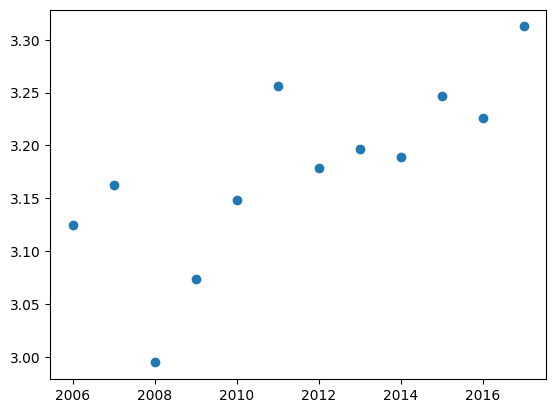

In [ ]:
plt.scatter(mean_rating.index,mean_rating.values)

График линейной регрессии:

<Axes: xlabel='Review Date'>

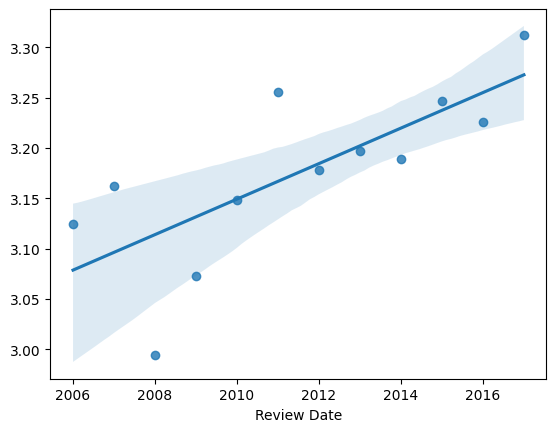

In [ ]:
sns.regplot(x=mean_rating.index, y=mean_rating.values)

In [ ]:
np_means_date = mean_rating.index.to_numpy().reshape(-1, 1)

In [ ]:
np_means_rating = mean_rating.values.reshape(-1, 1)

Построим полиномиальную модель.

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(np_means_date)
xp.shape

(12, 4)

In [ ]:
p_model = sm.OLS(np_means_rating, xp).fit()
ypred = p_model.predict(xp) 
ypred.shape

(12,)

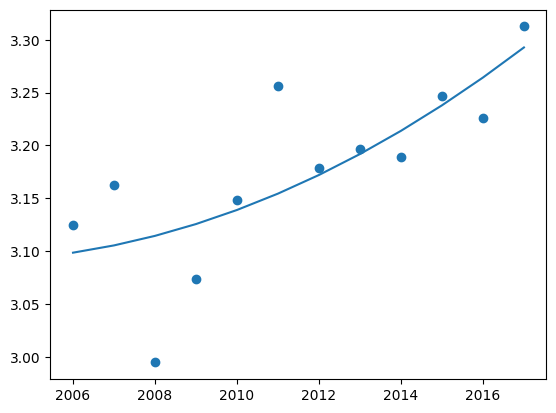

In [ ]:
plt.scatter(np_means_date,np_means_rating)
plt.plot(np_means_date,ypred)